In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
import warnings
warnings.filterwarnings('ignore')

mnist = keras.datasets.fashion_mnist

C:\Users\GL62VR\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(x_train, label_train), (x_test, label_test) = mnist.load_data()

# 1 Autoencoder

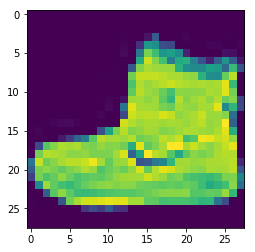

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
label_train = np_utils.to_categorical(label_train, 10) 
label_test = np_utils.to_categorical(label_test, 10)
plt.imshow(x_train[0, :, :].reshape(28,28))
plt.show()

In [4]:
auto_encoder = keras.Sequential()
# encoder
auto_encoder.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',  padding='same', input_shape=(28,28,1)))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',  padding='same'))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',  padding='same'))
auto_encoder.add(keras.layers.MaxPool2D((2,2), padding='same'))

#decoder
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu', padding='same'))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=8, kernel_size= (3,3), activation= 'relu', padding='same'))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=16, kernel_size= (3,3), activation= 'relu'))
auto_encoder.add(keras.layers.UpSampling2D((2,2)))
auto_encoder.add(keras.layers.Conv2D(filters=1, kernel_size= (3,3), activation= 'sigmoid', padding='same'))
auto_encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
auto_encoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 194us/step - loss: 45.9371 - val_loss: 40.5816
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 40.3115 - val_loss: 39.3327
Epoch 3/50
60000/60000 [==============================] - 5s 82us/step - loss: 39.2492 - val_loss: 38.5637
Epoch 4/50
60000/60000 [==============================] - 5s 81us/step - loss: 38.7203 - val_loss: 38.3042
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 38.3242 - val_loss: 37.8216
Epoch 6/50
60000/60000 [==============================] - 5s 81us/step - loss: 38.0322 - val_loss: 37.7182
Epoch 7/50
60000/60000 [==============================] - 5s 81us/step - loss: 37.7845 - val_loss: 37.5754
Epoch 8/50
60000/60000 [==============================] - 5s 80us/step - loss: 37.6525 - val_loss: 37.4940
Epoch 9/50
60000/60000 [==============================] - 5s 81us/step - loss: 37.5484 - val

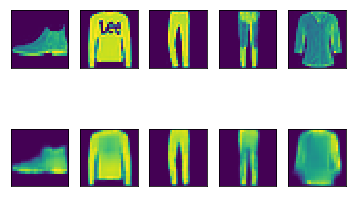

In [5]:
decoded = auto_encoder.predict(x_test)
n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



# 2.1 DCNN

In [6]:
dcnn = keras.Sequential()
dcnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1), input_shape=(28,28,1)))
dcnn.add(keras.layers.MaxPool2D((2,2)))
dcnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)))
dcnn.add(keras.layers.MaxPool2D((2,2)))
dcnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)))
dcnn.add(keras.layers.MaxPool2D((2,2)))
dcnn.add(keras.layers.Dropout(0.25))
dcnn.add(keras.layers.Flatten())
dcnn.add(keras.layers.Dense(256))
dcnn.add(keras.layers.Dense(10))
dcnn.add(keras.layers.Activation('softmax'))
dcnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
__________

In [7]:
dcnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
dcnn.fit(x_train, label_train, epochs=10, shuffle=True, validation_data=(x_test, label_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.7287 - acc: 0.7294 - val_loss: 0.5281 - val_acc: 0.8103
Epoch 2/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.5200 - acc: 0.8117 - val_loss: 0.4406 - val_acc: 0.8419
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.4560 - acc: 0.8347 - val_loss: 0.4051 - val_acc: 0.8538
Epoch 4/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.4216 - acc: 0.8477 - val_loss: 0.3996 - val_acc: 0.8566
Epoch 5/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.3969 - acc: 0.8552 - val_loss: 0.3944 - val_acc: 0.8596
Epoch 6/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.3811 - acc: 0.8632 - val_loss: 0.3832 - val_acc: 0.8568
Epoch 7/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.3686 - acc: 0.8665 - val_loss: 0.

training set accuracy: 0.8763     
test set accuracy: 0.8707

# 2.2 Transfer Learning

In [9]:
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.preprocessing.image import img_to_array, array_to_img

(x_train, label_train), (x_test, label_test) = mnist.load_data()
label_train = np_utils.to_categorical(label_train, 10) 
label_test = np_utils.to_categorical(label_test, 10)

train_X=np.dstack([x_train]*3)
test_X=np.dstack([x_test]*3)

train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])/255.
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])/255.

vgg_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
vgg_base.trainable = False
transfer_model = keras.Sequential()
transfer_model.add(vgg_base)
transfer_model.add(keras.layers.Flatten())
transfer_model.add(keras.layers.Dense(256, activation='relu'))
transfer_model.add(keras.layers.Dropout(0.5))
transfer_model.add(keras.layers.Dense(10, activation='softmax'))

transfer_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
transfer_model.fit(train_X, label_train, epochs=10, validation_split=0.3, batch_size=128)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 25s 605us/step - loss: 0.8292 - acc: 0.7092 - val_loss: 0.5732 - val_acc: 0.7974
Epoch 2/10
42000/42000 [==============================] - 25s 585us/step - loss: 0.5760 - acc: 0.7965 - val_loss: 0.5141 - val_acc: 0.8141
Epoch 3/10
42000/42000 [==============================] - 25s 587us/step - loss: 0.5241 - acc: 0.8127 - val_loss: 0.4763 - val_acc: 0.8248
Epoch 4/10
42000/42000 [==============================] - 25s 588us/step - loss: 0.4948 - acc: 0.8234 - val_loss: 0.4558 - val_acc: 0.8341
Epoch 5/10
42000/42000 [==============================] - 25s 588us/step - loss: 0.4739 - acc: 0.8297 - val_loss: 0.4524 - val_acc: 0.8348
Epoch 6/10
42000/42000 [==============================] - 25s 589us/step - loss: 0.4604 - acc: 0.8332 - val_loss: 0.4456 - val_acc: 0.8350
Epoch 7/10
42000/42000 [==============================] - 25s 594us/step - loss: 0.4497 - acc: 0.8355 - val_loss: 0.

In [10]:
test_score = transfer_model.evaluate(test_X, label_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 7s 689us/step
Test loss: 0.43680394361019137
Test accuracy: 0.8448


# 3 Text Classification

In [15]:
import pandas as pd
import nltk
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [16]:
twitter_data = pd.read_csv('./twitter-data/tweets_with_labels.csv', sep='\t')
twitter_data.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [23]:
import string
def preprocess(tweets):
    res = []
    
    for tweet in tweets:
        tokens = nltk.casual_tokenize(tweet)
        tks = []
        for term in tokens:
            if term.startswith('{') or term.startswith('@') or term.startswith('#'):
                continue
            else:
                tks.append(term)
        sentence = ' '.join(tks)
        res.append(sentence)
    return res

twitter_data['tweet_clean'] = preprocess(twitter_data['tweet'])
twitter_clean = twitter_data[twitter_data['tweet_clean']!='']
twitter_clean.head(5)

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,tweet_clean
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,Jazz for a Rainy Afternoon : link }
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,RT : : I love rainy days .
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,Good Morning Chicago ! Time to kick the Windy ...
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0,Preach lol ! :) RT : this type of weather all ...
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0,good morning sunshine


In [26]:
from sklearn.model_selection import train_test_split
train_set = twitter_clean['tweet_clean']
labels = twitter_clean.iloc[:,2:-1].values
x_train, x_test, label_train,label_test = train_test_split(train_set,labels,test_size=0.2,random_state=16)

tokenizer = Tokenizer(num_words=150)
tokenizer.fit_on_texts(x_train)

train_seq = tokenizer.texts_to_sequences(x_train) 
test_seq = tokenizer.texts_to_sequences(x_test)

text_train = pad_sequences(train_seq,maxlen=50)
text_test = pad_sequences(test_seq,maxlen=50)

In [32]:
from tensorflow.python.keras.callbacks import Callback
class RocAuc(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.x_val,self.y_val = validation_data
    def on_epoch_end(self, epoch, log={}):
        y_pred = self.model.predict(self.x_val, verbose=0)
        score = roc_auc_score(self.y_val, y_pred)
        print('\n ROC_AUC - epoch:%d - score:%.4f \n' % (epoch+1, score))


## 2.1 RNN

In [36]:
#roc = RocAuc(validation_data=(text_test, label_test))
rnn_model = keras.Sequential()
rnn_model.add(keras.layers.Embedding(150,64))
rnn_model.add(keras.layers.LSTM(32))
rnn_model.add(keras.layers.Dense(15, activation='softmax'))
rnn_model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics=['acc'])
rnn_history = rnn_model.fit(text_train,label_train,epochs = 10,validation_data = (text_test, label_test), batch_size = 64,verbose=1)

Train on 62325 samples, validate on 15582 samples
Epoch 1/10
62325/62325 [==============================] - 82s 1ms/step - loss: 1.7795 - acc: 0.6575 - val_loss: 1.4382 - val_acc: 0.7601
Epoch 2/10
62325/62325 [==============================] - 83s 1ms/step - loss: 1.4459 - acc: 0.7556 - val_loss: 1.4008 - val_acc: 0.7683
Epoch 3/10
62325/62325 [==============================] - 81s 1ms/step - loss: 1.4156 - acc: 0.7597 - val_loss: 1.3829 - val_acc: 0.7704
Epoch 4/10
62325/62325 [==============================] - 82s 1ms/step - loss: 1.3995 - acc: 0.7625 - val_loss: 1.3712 - val_acc: 0.7691
Epoch 5/10
62325/62325 [==============================] - 83s 1ms/step - loss: 1.3885 - acc: 0.7649 - val_loss: 1.3659 - val_acc: 0.7705
Epoch 6/10
62325/62325 [==============================] - 83s 1ms/step - loss: 1.3796 - acc: 0.7668 - val_loss: 1.3672 - val_acc: 0.7740
Epoch 7/10
62325/62325 [==============================] - 82s 1ms/step - loss: 1.3731 - acc: 0.7681 - val_loss: 1.3558 - val_acc

In [38]:
rnn_loss, rnn_acc = rnn_model.evaluate(text_test, label_test)
print('The accuracy of rnn model is: ', rnn_acc)

15582/15582 [==============================] - 9s 593us/step
The accuracy of rnn model is:  0.775060967821592


## 2.2 CNN

In [39]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Embedding(150,64))
cnn_model.add(keras.layers.Conv1D(64, kernel_size = 3,padding='valid',activation='relu',strides=1))
cnn_model.add(keras.layers.GlobalMaxPool1D())
cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dense(15, activation='softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(text_train,label_train,epochs = 10,validation_data = (text_test, label_test), batch_size = 64,verbose=1)

Train on 62325 samples, validate on 15582 samples
Epoch 1/10
62325/62325 [==============================] - 6s 101us/step - loss: 1.5771 - acc: 0.7171 - val_loss: 1.3774 - val_acc: 0.7747
Epoch 2/10
62325/62325 [==============================] - 5s 85us/step - loss: 1.3887 - acc: 0.7682 - val_loss: 1.3596 - val_acc: 0.7747
Epoch 3/10
62325/62325 [==============================] - 5s 82us/step - loss: 1.3676 - acc: 0.7712 - val_loss: 1.3637 - val_acc: 0.7753
Epoch 4/10
62325/62325 [==============================] - 5s 85us/step - loss: 1.3542 - acc: 0.7720 - val_loss: 1.3505 - val_acc: 0.7753
Epoch 5/10
62325/62325 [==============================] - 5s 86us/step - loss: 1.3432 - acc: 0.7736 - val_loss: 1.3494 - val_acc: 0.7719
Epoch 6/10
62325/62325 [==============================] - 5s 84us/step - loss: 1.3327 - acc: 0.7763 - val_loss: 1.3480 - val_acc: 0.7763
Epoch 7/10
62325/62325 [==============================] - 5s 88us/step - loss: 1.3247 - acc: 0.7763 - val_loss: 1.3438 - val_ac

In [40]:
cnn_loss, cnn_acc = cnn_model.evaluate(text_test, label_test)
print('The accuracy of rnn model is: ', cnn_acc)

15582/15582 [==============================] - 1s 77us/step
The accuracy of rnn model is:  0.7769220896211549


## 3.3 Compare

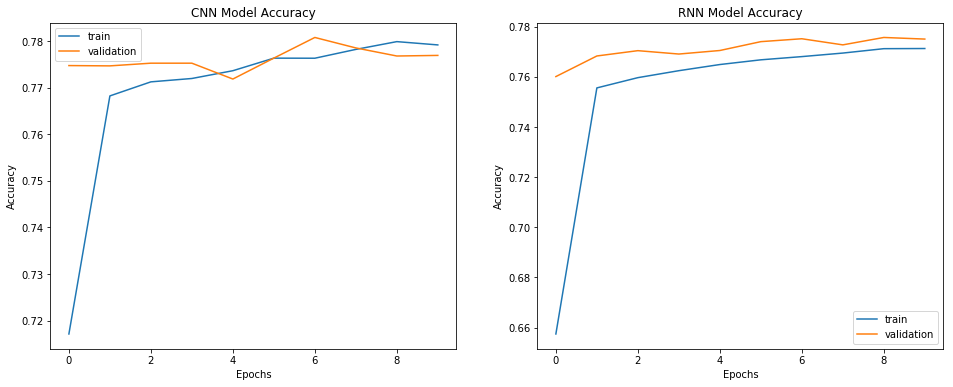

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()